In [20]:
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [21]:
# pip install scipy
# pip install statsmodels

In [44]:
# 1. Load the "Palmer Penguins" dataset
df = sns.load_dataset('penguins').dropna()

# We will compare the body mass of Adelie and Gentoo species
group1 = df[df['species'] == 'Adelie']['body_mass_g']
group2 = df[df['species'] == 'Gentoo']['body_mass_g']

print(f"Sample Sizes: Adelie={len(group1)}, Gentoo={len(group2)}")

# --- ASSUMPTION 1: Independence ---
# In this dataset, each row represents a unique penguin. 
# We assume they were sampled independently in the wild.

# --- ASSUMPTION 2: Normality (Shapiro-Wilk Test) ---
# Null Hypothesis (H0): Data is normally distributed.
shapiro_g1 = stats.shapiro(group1)
shapiro_g2 = stats.shapiro(group2)

print(f"Normality (Adelie): p={shapiro_g1.pvalue:.4f}")
print(f"Normality (Gentoo): p={shapiro_g2.pvalue:.4f}")

# If p > 0.05, we fail to reject H0 (Assumption met)

Sample Sizes: Adelie=146, Gentoo=119
Normality (Adelie): p=0.0423
Normality (Gentoo): p=0.2605


### Visually inspect the two distributions - Histograms

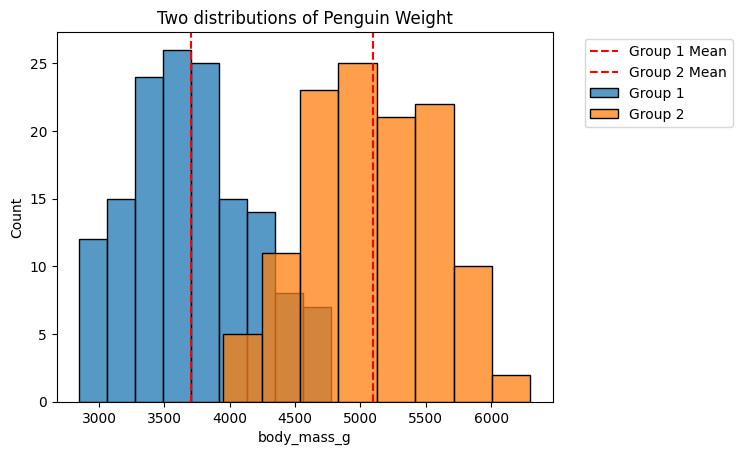

In [46]:
# overlay the two distributions
sns.histplot(group1,label='Group 1')
sns.histplot(group2, label='Group 2')

plt.title('Two distributions of Penguin Weight')
plt.axvline(x=3706.16, color='red', linestyle='--', label='Group 1 Mean')
plt.axvline(x=5092.44, color='red', linestyle='--', label='Group 2 Mean')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

### Normal distributions - t-test

The t-test assumes that as the sample size gets larger, the central limit theorem applies. This states that the sample means will approach a normal distribution even if the underlying data may be skewed. At a sample size of n=30 the heuristic is applied to most data sets. In this case, the test indicates the data is nearly normally distributed and we can see from the histrogram that the data approaches the bell shape curve of the normal distribution.

A normal distribution has key characteristics including a mean, median, and mode that approach the same middle value. On either side of this middle value, the weight or distribution of samples is equal.

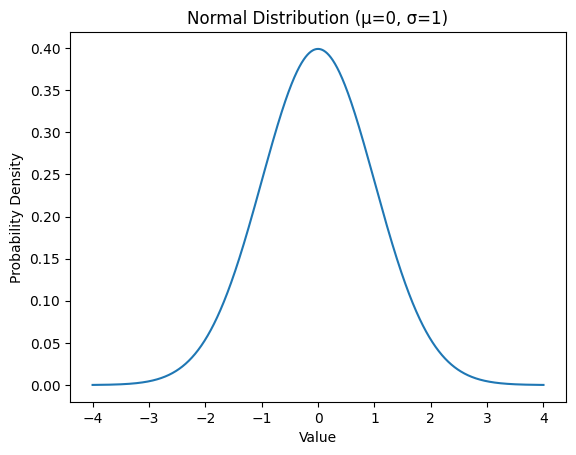

In [47]:
from scipy.stats import norm

# Parameters
mu = 0        # mean
sigma = 1     # standard deviation

# Generate x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Normal distribution PDF
y = norm.pdf(x, mu, sigma)

# Plot
plt.figure()
plt.plot(x, y)
plt.title("Normal Distribution (μ=0, σ=1)")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.show()

In [56]:
round(np.mean(x),2), round(np.median(x),2)

(np.float64(0.0), np.float64(0.0))

### Homogeneity of Variance

In [45]:
# --- ASSUMPTION 3: Homogeneity of Variance (Levene's Test) ---
# Null Hypothesis (H0): Variances are equal.
levene_test = stats.levene(group1, group2)
print(f"Equal Variance: p={levene_test.pvalue:.4f}")
# If p > 0.05, we fail to reject H0 (Assumption met)

if levene_test.pvalue >.05:
    print('Fail to reject the null hypothesis. Therefore, equal variance T-test is True')
else:
    print('Reject the null hypothesis. Equal variance is false')

Equal Variance: p=0.1659
Fail to reject the null hypothesis. Therefore, equal variance T-test is True


In [ ]:


# --- PERFORM THE T-TEST ---
# If Levene's test p < 0.05, use equal_var=False (Welch's T-test)

equal_variance_input = levene_test.pvalue > 0.05

print()
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=equal_variance_input)

print(f"\nT-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4e}") # Using scientific notation as it will be very small

if p_val < 0.05:
    print("Result: Statistically significant difference between species weight.")
else:
    print("Result: No statistically significant difference found.")

Sample Sizes: Adelie=146, Gentoo=119
Normality (Adelie): p=0.0423
Normality (Gentoo): p=0.2605
Equal Variance: p=0.1659
Fail to reject the null hypothesis. Therefore, equal variance T-test is True


T-Statistic: -23.4668
P-Value: 1.8807e-66
Result: Statistically significant difference between species weight.


# Results

The t-test indicates that the two species of penguins have a stastically significantly different mean. Therefore, we reject the null hypothesis and state that the Gentoo penguins have a statistically significantly greater weight than the Adelie penguins.

This means that it is unlikely the two means came from a single population. 

An alpha of .05 indicates that if they were of the same population, then the result would occur 5% of the time of less simply due to chance. However, from a statistical point of view, with a p-value below this .05 value, we reject the idea that the samples came from the same population of data. 

## T-test Business Use Case

The t-test can now be utilized in business settings that provide a clear A/B test, experimental design, or another two sample scenario, such as dividing the data by a characteristic. Further research into marketing can utilize experimental design like a Differences in Differences (DiD) design, implementing a treatment into a subset of the stores or accounts. Another technique can be to compare how sales changed after an change to store format or display. These examples provides businesses with the opportunity to test their results with statistical rigor.

Two examples will be shown in the other notebooks. A DiD design in one notebook and a change to store layout in another. Both provide a great example for T-tests.

### More than two samples?

When there are more than two samples, the Analysis of Variance or ANOVA technique is used before a T-test. This test will be explained in the ANOVA notebook.

In [24]:
# average mass
avg_mass = group1.mean()

# Standard Deviation
std_mass = group1.std()
print('Group 1 Statistics')
print(f"Mean: {avg_mass:.2f}")
print(f"Std Dev: {std_mass:.2f}")

Group 1 Statistics
Mean: 3706.16
Std Dev: 458.62


In [25]:
# average mass
avg_mass2 = group2.mean()

# Standard Deviation
std_mass2 = group2.std()

print('Group 2 Statistics')
print(f"Mean: {avg_mass2:.2f}")
print(f"Std Dev: {std_mass2:.2f}")

Group 2 Statistics
Mean: 5092.44
Std Dev: 501.48


### Q-Q plots help to check for normality. The close to the red line, the closer the data points are to a normal distribution

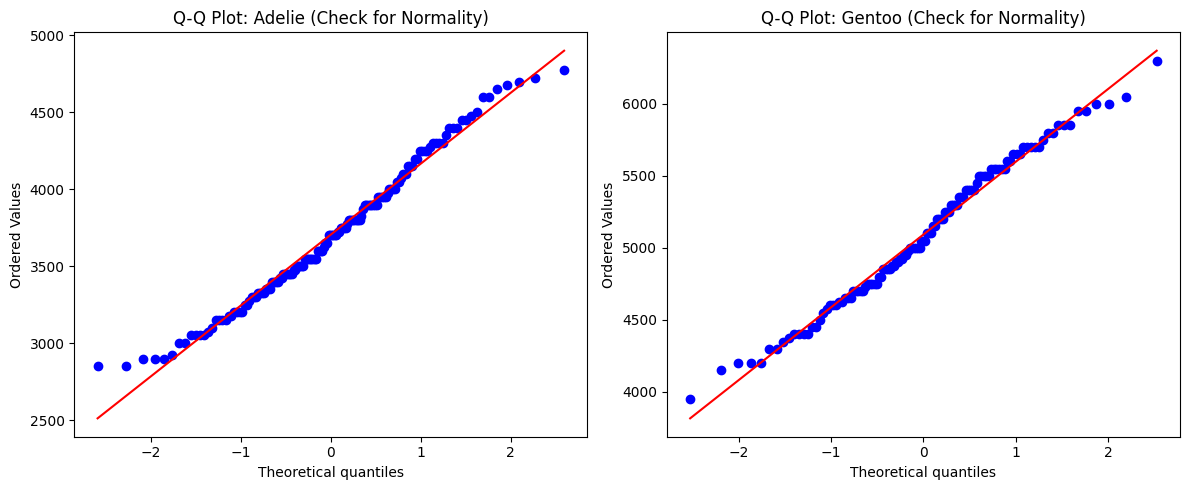

In [26]:
# Assuming 'group1' is Adelie and 'group2' is Gentoo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q plot for Group 1 (Adelie)
stats.probplot(group1, dist="norm", plot=ax1)
ax1.set_title("Q-Q Plot: Adelie (Check for Normality)")

# Q-Q plot for Group 2 (Gentoo)
stats.probplot(group2, dist="norm", plot=ax2)
ax2.set_title("Q-Q Plot: Gentoo (Check for Normality)")

plt.tight_layout()
plt.savefig('penguin_qq_plots.png')

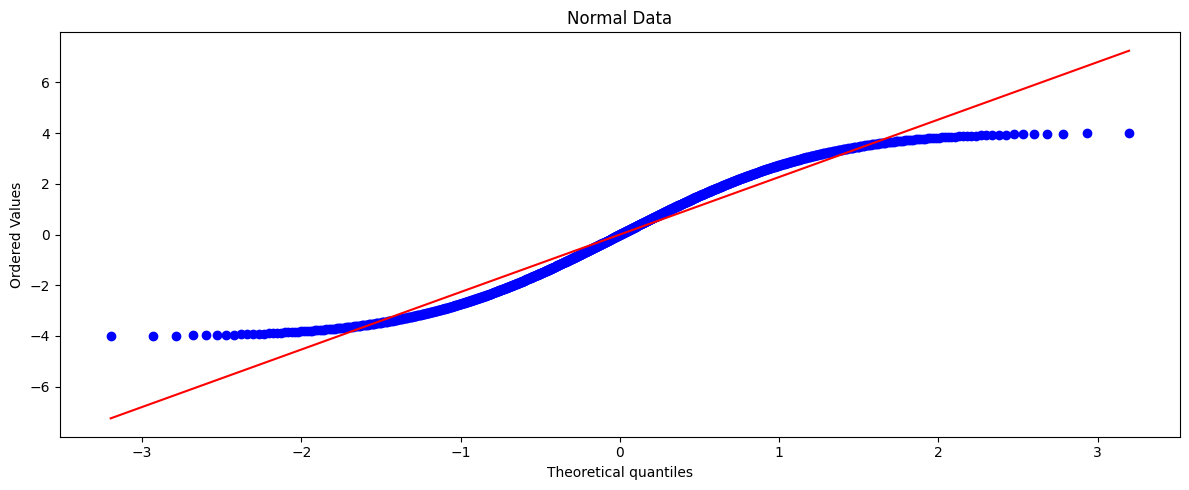

In [71]:
# Assuming 'group1' is Adelie and 'group2' is Gentoo
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))

# Q-Q plot for Group 1 (Adelie)
stats.probplot(x, dist="norm", plot=ax1)
ax1.set_title("Normal Data")

plt.tight_layout()

# Effect Size

In [27]:
def cohen_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    
    # Calculate pooled standard deviation
    pooled_sd = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    
    # Calculate d
    return (np.mean(group1) - np.mean(group2)) / pooled_sd

d = cohen_d(group1, group2)
print(f"Cohen's d: {d:.4f}")

Cohen's d: -2.8982


# Statistical Power

In [28]:
from statsmodels.stats.power import TTestIndPower

analysis = TTestIndPower()

# Calculate sample size needed
required_n = analysis.solve_power(effect_size=0.2, # Medium effect
                                  alpha=0.05, 
                                  power=0.80, 
                                  ratio=1.0) # Equal group sizes

print(f"Required sample size per group: {round(required_n)}")

Required sample size per group: 393


In [29]:
# Calculate sample size needed
required_n = analysis.solve_power(effect_size=0.5, # Medium effect
                                  alpha=0.05, 
                                  power=0.80, 
                                  ratio=1.0) # Equal group sizes

print(f"Required sample size per group: {round(required_n)}")

Required sample size per group: 64


<Figure size 1000x600 with 0 Axes>

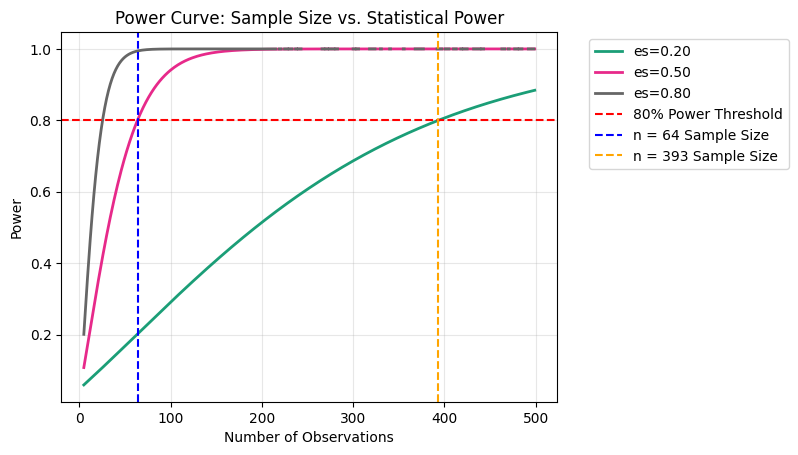

In [37]:
# 1. Setup the power analysis object
analysis = TTestIndPower()

# 2. Define parameters
effect_sizes = np.array([0.2, 0.5, 0.8]) # Small, Medium, Large
sample_sizes = np.arange(5, 500) # Range of n to test

# 3. Plot the curves
plt.figure(figsize=(10, 6))
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, 
                    effect_size=effect_sizes, alpha=0.05)

plt.title('Power Curve: Sample Size vs. Statistical Power')
plt.axhline(y=0.8, color='red', linestyle='--', label='80% Power Threshold')

plt.axvline(x=64, color='blue', linestyle='--', label= 'n = 64 Sample Size')

plt.axvline(x=393, color='orange', linestyle='--', label= 'n = 393 Sample Size')

plt.grid(alpha=0.3)
plt.ylabel('Power')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();

# Post Hoc Power Analysis

Considering a high Cohen's D rating of 1 is accomplished with a group of n, we have a nearly 100% chance of detecting our results given our sample size and effect size. Future research could now use this information to better prepare studies. In particular, with strict resource management, we may be able to replicate the study with a smaller sample size. This benefits the company as now we can push resources into areas of research that are unknown.

In [34]:
from statsmodels.stats.power import TTestIndPower

# Assuming your penguin groups have roughly 50-100 samples each
n_group = 50
d = 1
alpha = 0.05

analysis = TTestIndPower()
power = analysis.solve_power(effect_size=d, nobs1=n_group, alpha=alpha, ratio=1.0)

print(f"Calculated Power: {power:.4f}")

Calculated Power: 0.9986


# Minimal Detectable Effect

Minimal detectable effect could be performed before the research to elucidate what are sample size is able to detect given the power and alpha variables. Given our sample size of 300, we can see a difference of .2291 standard deviations is detectable.

Now, if we anticipated that the difference would be smaller, we can increaase our sample size. When research into areas has many unknowns, preparing the study appropriately before hand helps prevent using resources that do not produce meaningful results because the study is underpowered.

In [32]:
from statsmodels.stats.power import TTestIndPower

analysis = TTestIndPower()

# Solve for MDE (Effect Size)
mde = analysis.solve_power(
    effect_size=None, # Leave this empty to solve for MDE
    nobs1=300,        # Your actual sample size per group
    alpha=0.05,       # Your significance level
    power=0.80,       # The industry standard power
    ratio=1.0
)

print(f"Minimum Detectable Effect (Cohen's d): {mde:.4f}")

Minimum Detectable Effect (Cohen's d): 0.2291


In [33]:
analysis = TTestIndPower()

# Solve for MDE (Effect Size)
mde = analysis.solve_power(
    effect_size=None, # Leave this empty to solve for MDE
    nobs1=500,        # Your actual sample size per group
    alpha=0.05,       # Your significance level
    power=0.80,       # The industry standard power
    ratio=1.0
)

print(f"Minimum Detectable Effect (Cohen's d): {mde:.4f}")

Minimum Detectable Effect (Cohen's d): 0.1774
